---
### TITLE: The Inference with Sensors
### AUTHOR: Honggeun Ji
### DATE: 10.Nov.2021.
---

# Tap Position Inference with Flutter and Keras
<div>
<img src="https://media.vlpt.us/images/swara/post/f984346a-d7a6-4ff7-981e-9b71de5d61c7/flutter.png" width="200"/>
<img src="https://miro.medium.com/max/600/0*LZQf7b4u8f97izwV.png" width="200"/>
</div>

In this lab, I would like to show you the tap position inference using
these two sensory data.

*   Accelerometer Sensory Data
*   Gyroscope Sensory Data



# Data Collection



> **Q. What kinds of Sensory Data and How do we collect?**


### What Data?
**Inspired by Professor Li's "Privacy Leakage in Smart Device" introduction.**

*   In general, there are three diffent types of sensors on mobile devices.

         1. Accelerometer 
         2. Gyroscope
         3. Magnetometer

*   This lab only deals with those two sensors except the Magnetometer.

*   Based on those two sensors, we may collect sensory data at the moment our user tapped a zone.
*   The zones are divided into 12 parts; however, this lab will only show you the case of 6 tapping zone. (As I want to show you the testing case first, after this labs seems valid, I'll move on to the next stages.)

</br>

### Data, Data, Data... How to collect?
**Inspired from Android App Development introduction.**


*   The way how I develop an app is quite different from lagacy project.
*   Typically, professional developers choose the native development way so that the app works powerfully. (High performance, Faster Reload, and using the native hardware)

*   However, it requires at least 3 months to become confident on the native application development.
*   This is the reason why I choose **Flutter**. The Flutter is a cross-platform development framework made by Google.
*   Not that powerful than the native one, but **this still leads us to implement the sensor data.**
*   Also, the Flutter use the programming language, **Dart**, which is quite similar with Java.
*   Use the Flutter packages to capture the sensor data with tap position at the moment when a user tap those zone. 

</br>

**Tapping the App looks like,**
<div>
<img src="https://drive.google.com/uc?id=1F-Od3yLodwsoKUzGqZ9Cww9kqAWPvP3w" width="350" height="500">
<img src="https://drive.google.com/uc?id=1jyhw4BWNRr8NckquDIZMLWWQ4v2A4QEf" width="250" height="500">
</div>

</br>
</br>
</br>


> **Q. How do we collect?**

### Database Comes Here!

*   Send those sensory data and tap position information to the Database.
*   Here, I used FireStore from Google Firebase.

</br>

### What is Firestore?


*   It is a Database based on NoSQL.
*   Lightweight, Easy to store the data.
*   Easy to export the data into .csv or .json form.
*   Every record is regard as "Document".

*   Firestore looks like this,
<img src="https://drive.google.com/uc?id=1E4iyC5fTlCAWO_cJt6oOcoR7IQna_hvc" width="950" height="480">

*   My Flutter App will send those data set into this Firestore Database.
</br>
</br>
</br>


# Data Ready

### Tapping The Zone At Least 170 times
*   Why 170 times? -> **In order to divide the training data and validation data appropriately.**
*   Tap each 6 zones (zone 0, 2, 5, 6, 9 and 11) 170 times respectively.
*   Flutter App will send the snapshot of the sensory data and tap position.

</br>

### After finished Tapping
*   See the data has beend successfully collected.
*   Showing the partial result

</br>

<img src="https://drive.google.com/uc?id=1CwkwpQgJSXOOCoI58Mdoo3jQY4KMDyIU" width="750" height="550">

*   **Export the Firestore collection into .csv file**

</br></br>





#Data Preprocessing

1.   **Import Pandas package to use the .csv file**
2.   **Open the .csv file and save it.**




In [ ]:
import pandas as pd

data_all = pd.read_csv('sample_data/sensory_data.csv')

3.   **Divide the *data_all* into *INPUT DATA* and *TARGET DATA***



In [ ]:
x = data_all.drop(['__id__', 'tapped_zone', 'tap_position_x', 'tap_position_y'], axis=1)  # Drop evertyig except sensory data
y = data_all.tapped_zone  # only the tapping zone

In [ ]:
# check out the division result
x.sample(5)  # INPUT DATA

,accelerometer1,accelerometer2,accelerometer3,gyroscope1,gyroscope2,gyroscope3
131,0.366364,1.141409,11.135806,-1.178547,2.324672,0.389782
101,-2.278632,1.588522,10.676431,-1.782574,-2.572955,-0.294895
337,-1.659253,1.448257,10.325320,-0.737805,-2.389644,-0.076489
62,0.666183,-1.208701,10.582074,0.920327,-0.874574,-0.073958
47,0.804355,0.300867,10.784247,-0.460065,1.309208,0.288467


In [ ]:
# Don't worry about the matching, 
# division will be processed based on the original records.
y.sample(5)  # TARGET DATA

779    2.0
520    6.0
53     9.0
679    2.0
772    6.0
Name: tapped_zone, dtype: float64

4.   **Throw away the inappropriate record (if is missing column data)**

In [ ]:
x = x.dropna()
y = y.dropna()

5.   **Split the data into training and validating data (80:20):**


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

6. **One-Hot Encoding (In order to categorize in an array)**
</br>
</br>
Brief concept of One-Hot Encoding
</br>
<img src="https://drive.google.com/uc?id=1rTFKopldrOD9VXxwSGh1iPeFrw_1f3X8" width="2000" height="200">

In [ ]:
import tensorflow as tf
y_train_encoded = tf.keras.utils.to_categorical(y_train)  # one-hot encoding for training target
y_val_encoded = tf.keras.utils.to_categorical(y_val)      # one-hot encoding for validate target

In [ ]:
# check out the shape
print(y_train_encoded.shape, y_val_encoded.shape)
print(x_train.shape, x_val.shape)

(815, 12) (204, 12)
(815, 6) (204, 6)


## Preprocessing Done!

*   Guess no need standardization as the scale of the input data is not that different.
</br>
</br>

# Training
1. **Simply build a neural network with two layers from Tensorflow Keras**

</br>
<img src="https://drive.google.com/uc?id=1eaw2YBh8L8SSXOoSTw1wrzt26Yuj79-C" width="500" height="300">


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()  # Entire Sequential Neural Network
model.add(Dense(80, activation='sigmoid', input_shape=(6,), kernel_regularizer='l2'))  # Add the hidden layer with 80 unit(Neuron)
model.add(Dense(12, activation='softmax'))  # Add the output layer (give us 12 classes)

# optimizer is SGD (Stochastic Gradient Descent) with Learning Rate = 0.01 (default)
# loss function should be categorical as this is the multiple classification problem
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

2.  **Start the training with preprocessed data (with 10 epochs)**

*   Just checking out whether the training is possible or not
*   If there are no problems with this training, the accuracy will be low, so we need to increase the epoch.




In [ ]:
history = model.fit(x_train, y_train_encoded, epochs=10, validation_data=(x_val, y_val_encoded))

Epoch 1/10
26/26 [==============================] - 1s 9ms/step - loss: 2.4094 - accuracy: 0.1669 - val_loss: 2.2096 - val_accuracy: 0.1667
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 2.1202 - accuracy: 0.1681 - val_loss: 2.0378 - val_accuracy: 0.1716
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 1.9952 - accuracy: 0.1718 - val_loss: 1.9467 - val_accuracy: 0.1814
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 1.9216 - accuracy: 0.2356 - val_loss: 1.8868 - val_accuracy: 0.2745
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 1.8671 - accuracy: 0.3117 - val_loss: 1.8375 - val_accuracy: 0.3824
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 1.8207 - accuracy: 0.4221 - val_loss: 1.7936 - val_accuracy: 0.3627
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 1.7791 - accuracy: 0.4331 - val_loss: 1.7539 - val_accuracy: 0.3676
Epoch 8/10
26/26 [==

In [ ]:
# check the keys of the training history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


3.  **If there is no training error, check out the accuracy**

In [ ]:
loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print(accuracy)

0.1666666716337204


4.  **Seems the training works but the accuracy is quite low (pointless...)**
5.  **Increase the epoch and see the result**


In [ ]:
history = model.fit(x_train, y_train_encoded, epochs=300, validation_data=(x_val, y_val_encoded))  # with 300 epochs

Epoch 1/300
26/26 [==============================] - 1s 10ms/step - loss: 2.2383 - accuracy: 0.1620 - val_loss: 2.0997 - val_accuracy: 0.1618
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 2.0483 - accuracy: 0.1485 - val_loss: 1.9941 - val_accuracy: 0.1863
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 1.9684 - accuracy: 0.2012 - val_loss: 1.9336 - val_accuracy: 0.1422
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 1.9152 - accuracy: 0.1706 - val_loss: 1.8862 - val_accuracy: 0.1471
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 1.8712 - accuracy: 0.1816 - val_loss: 1.8443 - val_accuracy: 0.1912
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 1.8304 - accuracy: 0.2859 - val_loss: 1.8065 - val_accuracy: 0.2549
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 1.7947 - accuracy: 0.3190 - val_loss: 1.7726 - val_accuracy: 0.4853
Epoch 8/300


In [ ]:
loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print(accuracy)

0.9509803652763367


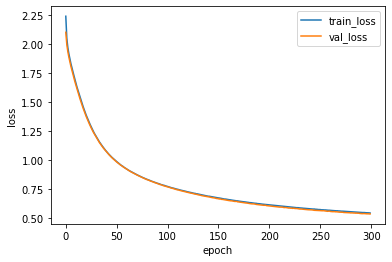

In [ ]:
# loss graph
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

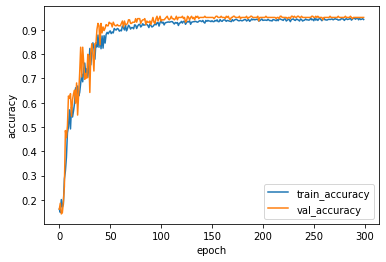

In [ ]:
# accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

6.  **If the accuracy is more than 95%, we are almost done.**
7.  **If the accuracy is not more than 95%, find the other regularizers or epochs. (Maybe the input data is wrong...)**
8.  **Predict the class with testing data (use test .csv file)**

In [ ]:
#import the testing .csv file
test_data_all = pd.read_csv('sample_data/sensory_data_test.csv')

# test data preprocessing
x_test = test_data_all.drop(['__id__', 'tapped_zone', 'tap_position_x', 'tap_position_y'], axis=1)  # Drop evertyig except sensory data
y_test = test_data_all.tapped_zone  # only the tapping zone

# drop the wrong record
x_test = x_test.dropna()
y_test = y_test.dropna()

# one-hot encoding for test target
y_test_encoded = tf.keras.utils.to_categorical(y_test)  

# check out the shape
print(x_test.shape)
print(y_test_encoded.shape)

(26, 6)
(26, 12)


In [ ]:
loss2, accuracy2 = model.evaluate(x_test, y_test_encoded, verbose=0)
print(accuracy2)

0.9230769276618958


## Guess we have a meaningful experiment result!

*   Accuaracy of testing data looks not beautiful...


    1.   Suspicious about Overfitting
    2.   Suspicious about Data Collection (How to collect more clean, more accurate sensory data?)
    3.   Suspicious about neural network depth
    4.   Suspicious about the regularization (L1? or L2?)


*   Proceed to the next step? (Inference the every zones)

